# (Judul Project)

>Project by:
- [Muhammad Azhar Khaira](https://www.linkedin.com/in/azharkhaira/) (Data Scientist)
- [Yuzal Qushoyyi Wahyudi](https://www.linkedin.com/in/yuzalqushoyyiwahyudi/) (Data Engineer)
- [Astrila Ikhlasia Eprina](https://www.linkedin.com/in/astrilalia/) (Data Analyst)

# A. Pendahuluan

**Ringkasan Data:**
- Sumber dataset: [Kaggle - Customer Churn Dataset](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset)
- Dataset ini berguna untuk menganalisis dan memprediksi churn pelanggan, yaitu situasi di mana pelanggan berhenti menggunakan layanan suatu perusahaan.
- Nama kolom dan isi kolom pada Dataset ini:

| Nama Kolom | Keterangan Isi Kolom|
| -----------| ----------|
|1. **CustomerID** | ID unik untuk setiap pelanggan.|
|2. **Age** | Usia pelanggan. (per tahun)|
|3. **Gender** | Jenis kelamin pelanggan. (Male/Female)|
|4. **Tenure** | Lama pelanggan berlangganan. (per bulan)|
|5. **Usage Frequency** | Frekuensi penggunaan layanan oleh pelanggan. (per bulan)|
|6. **Support Calls** | Jumlah panggilan yang dilakukan pelanggan pada customer support.|
|7. **Payment Delay** | Jumlah hari keterlambatan pembayaran oleh pelanggan. (per hari)|
|8. **Subscription Type** | Tipe langganan pelanggan (misalnya, Basic, Standard).|
|9. **Contract Length** | Durasi kontrak langganan (misalnya, Monthly, Annual).|
|10. **Total Spend** | Total pengeluaran pelanggan selama berlangganan. (per bulan)|
|11. **Last Interaction** | Jumlah hari sejak interaksi terakhir pelanggan dengan layanan. (per hari)|
|12. **Churn** _(Target)_ | Status apakah pelanggan berhenti berlangganan atau tidak (1 untuk churn, 0 untuk tidak).|

#### A.1. **Latar Belakang**
- Berdasarkan publikasi statistik dari Kementerian Perdagangan tentang **PERDAGANGAN DIGITAL (_E-COMMERCE_) INDONESIA PERIODE 2023**, menyatakan bahwa _e-commerce_ di Indonesia telah mengalami pertumbuhan yang signifikan dari 2019 hingga 2023, menjadikannya salah satu pasar _e-commerce_ terbesar di Asia Tenggara. Peningkatan akses internet, adopsi _smartphone_, dan perubahan perilaku konsumen telah mendorong perkembangan ini. Namun, meskipun pasar _e-commerce_ di Indonesia berkembang pesat, perusahaan-perusahaan _e-commerce_ menghadapi tantangan besar, salah satunya adalah `churn pelanggan`.

#### A.2. **Pernyataan Masalah**
- Pelanggan adalah aset penting bagi perusahaan, dan perpindahan pelanggan (customer churn) dapat mengancam keberlanjutan bisnis, terutama dalam industri _e-commerce_ yang kompetitif. Tingginya biaya akuisisi pelanggan baru dan dampak negatif churn terhadap pendapatan dan reputasi, penting bagi perusahaan untuk mengembangkan model prediksi churn yang efektif.

#### A.3. **Objektif**
- Membuat model prediksi dan model clustering yang bertujuan untuk memprediksi churn dan memberikan rekomendasi untuk toko online guna membantu perusahaan _e-commerce_ dalam mempertahankan pelanggan dan mengurangi risiko kehilangan pangsa pasar.


# B. Import Libraries

In [1]:
# For basic
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# C. Data Loading

In [2]:
# Load Data
df = pd.read_csv('dataset/clean_customer_churn.csv')
df

C:\Users\Astrila\AppData\Local\Temp\ipykernel_6856\3417594971.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/clean_customer_churn.csv')


,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,True
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,True
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,True
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,True
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,False
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,False
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,False
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,False


In [3]:
# Cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customerid         440832 non-null  float64
 1   age                440832 non-null  float64
 2   gender             440832 non-null  object 
 3   tenure             440832 non-null  float64
 4   usage_frequency    440832 non-null  float64
 5   support_calls      440832 non-null  float64
 6   payment_delay      440832 non-null  float64
 7   subscription_type  440832 non-null  object 
 8   contract_length    440832 non-null  object 
 9   total_spend        440832 non-null  float64
 10  last_interaction   440832 non-null  float64
 11  churn              440832 non-null  object 
dtypes: float64(8), object(4)
memory usage: 40.4+ MB


- Berdasarkan dataset di atas, terdapat lebih dari 440 ribu baris dan 12 kolom.
- Tipe data terdiri dari float dan string.
- Terlihat 1 missing value pada masing-masing kolom. Missing value ini akan di drop pada bagian Feature Engineering.

In [4]:
# Cek statistik dataset
df.describe()

,customerid,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000


- Berdasarkan data statistik di atas, beberapa kolom seperti kolom age, support_calls, payment_delay, dan last_interaction terlihat memiliki distribusi yang normal. Hal ini ditunjukkan dengan nilai median dan nilai rata-rata yang sama.
- Sedangkan seperti kolom tenure, usage_frequency, dan total_spend ada sedikit skewed pada distribusinya karena nilai median dan nilai rata-rata yang sedikit berbeda.

Insight:
- Customer perusahaan ini memiliki variasi usia yang cukup luas, dari usia 18 tahun hingga 65 tahun dengan rata-rata usia customernya ada pada usia 39 tahun. Bisa diduga bahwa banyak pengguna produk ini oleh customer yang sudah berkeluarga, dimana usia 39 tahun adalah usia produktif dan cenderung mapan.
- Paling lama seorang customer dalam menggunakan produk perusahaan ini adalah selama 5 tahun dan yang paling sedikit 1 bulan. Dimana rata-rata customer yang sudah berlangganan dengan produk ini adalah sekitar hampir 3 tahun (2 tahun 8 bulan) atau 32 bulan. Artinya perusahaan ini sudah berjalan selama 5 tahun dan memiliki banyak pelanggan setia hingga bertahun-tahun lamanya.
- Jumlah keluhannya pun juga menunjukkan angka yang cukup baik, dimana rata-ratanya hanya ada 3 kali, tetapi perlu diperhatikan juga pada customer yang memiliki keluhan hingga 10 kali dalam sebulan. Apa yang menyebabkan customer menghubungi customer support hingga sebanyak itu?
- Adapun customer yang telat membayar paling lambat ada pada 30 hari dan rata-ratanya ada pada 12 hari menunggak. Hal ini perlu ada tinjauan lebih lanjut untuk mengetahui cara mengurangi angka tunggakan pembayaran selanjutnya.
- Total pengeluaran oleh customer dalam berlangganan dengan produk ini sebanyak 631 dollars. Angka ini bisa jadi merupakan total pengeluaran dari akumulasi berlangganan selama bertahun-tahun.

In [5]:
# Cek 5 data awal dari dataset
df.head()

,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,True
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,True
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,True
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,True
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,True


In [6]:
# Cek 5 data akhir dari dataset
df.tail()

,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,False
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,False
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,False
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,False
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,False


In [7]:
# Cek missing value
df.isnull().sum()

customerid           1
age                  1
gender               1
tenure               1
usage_frequency      1
support_calls        1
payment_delay        1
subscription_type    1
contract_length      1
total_spend          1
last_interaction     1
churn                1
dtype: int64

- Terdapat 1 missing value pada masing-masing kolom. Saya akan mengecek bagaimana penyebaran missing value dalam dataset, apakah missing value ini terdapat dalam 1 baris yang sama atau tersebar di beda-beda baris.

In [8]:
# Cek data yang terdapat missing value
df[df.isnull().any(axis=1)]

,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Dari hasil diatas bahwa missing value berada dalam 1 kolom yang sama, dimana kolom target dan kolom fitur tidak memiliki data. Hal ini bisa terjadi karena adanya kesalahan pada sample selection. Sehingga missing value ini memiliki karakter MCAR atau Missing Completely At Random yang bisa dihandle dengan drop missing value.

In [9]:
# Cek data duplikat
df.duplicated().sum()

np.int64(0)

- Tidak terdapat data duplikat sehingga bisa dilanjutkan ke EDA.

In [10]:
# Cek kolom
df.columns

Index(['customerid', 'age', 'gender', 'tenure', 'usage_frequency',
       'support_calls', 'payment_delay', 'subscription_type',
       'contract_length', 'total_spend', 'last_interaction', 'churn'],
      dtype='object')

In [11]:
# Lihat kolom numeric dan categoric
num_cols = df.select_dtypes(exclude='object').columns
cat_cols = df.select_dtypes(include='object').columns

print(num_cols)
print(cat_cols)

Index(['customerid', 'age', 'tenure', 'usage_frequency', 'support_calls',
       'payment_delay', 'total_spend', 'last_interaction'],
      dtype='object')
Index(['gender', 'subscription_type', 'contract_length', 'churn'], dtype='object')


# D. Exploratory Data Analysis (EDA)

## D.1. Cek skewness

In [12]:
# Cek skew
skew = []
skew_value = []
no_skew = []
no_skew_value = []

for col in num_cols:
    if -0.5 < df[col].skew() < 0.5:
        no_skew.append(f'{col}')
        no_skew_value.append(f'{df[col].skew()}')
    else:
        skew.append(f'{col}')
        skew_value.append(f'{df[col].skew()}')

# Cek kolom yang skew
with_skew = pd.DataFrame()
with_skew['skew'] = skew
with_skew['value'] = skew_value
with_skew.sort_values(by='value')

,skew,value
0,support_calls,0.6668085055364665


- Terdapat 1 kolom yang skew, yaitu support_calls dengan distribusi positif highly skewed.

In [13]:
# Cek kolom yang tidak skew
without_skew = pd.DataFrame()
without_skew['no skew'] = no_skew
without_skew['value'] = no_skew_value
without_skew.sort_values(by='value')

,no skew,value
0,customerid,-0.018485823477350564
3,usage_frequency,-0.04347347834004235
2,tenure,-0.06140161012514125
5,total_spend,-0.45717407583498315
1,age,0.16201568056624344
6,last_interaction,0.176774050508568
4,payment_delay,0.267407125464574


- Kolom lainnya terdistribusi normal.

## D.2. Target

In [14]:
# Cek unique value
df.churn.unique()

array([True, False, nan], dtype=object)

- Ada 1 missing value. Terkait dengan temuan di atas, maka missing value ini akan di drop pada Feature Engineering.

In [15]:
# Cek total value kolom target
churn_counts = df.churn.value_counts()
churn_counts

churn
True     249999
False    190833
Name: count, dtype: int64

- Dari total 440 ribu data, terdapat hampir 250 ribu customer yang mengalami churn. Nilai ini melebihi setengah total seluruh pelanggan dan hal ini tentu tidak baik apabila angkanya terus meningkat dari segi bisnis.

In [16]:
# Cek missing value kolom target
df.churn.isnull().sum()

np.int64(1)

- Ada 1 missing value dan akan di drop pada FE.

C:\Users\Astrila\AppData\Local\Temp\ipykernel_6856\2105205108.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="Blues")


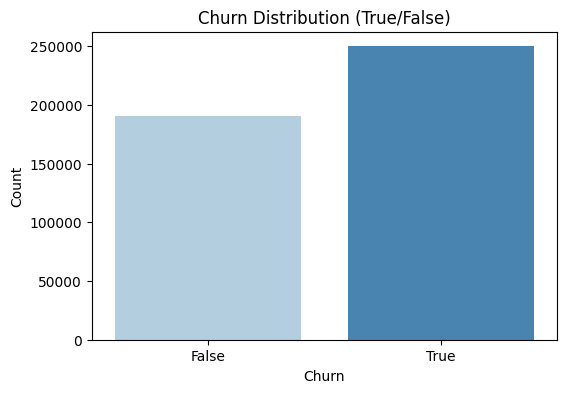

In [17]:
# Create a bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="Blues")

# Add title and labels
plt.title('Churn Distribution (True/False)')
plt.xlabel('Churn')
plt.ylabel('Count')

# Show the plot
plt.show()

- Perbandingan total pelanggan yang churn dan yang tidak churn. Pelanggan yang churn lebih banyak dibandingkan yang tidak. Kita perlu melihat faktor-faktor apa saja yang mempengaruhi terjadinya churn pada pelanggan.

## D.3. Numerik

### D.3.1. Kolom age

In [18]:
# Cek statistik
df.age.describe()

count    440832.000000
mean         39.373153
std          12.442369
min          18.000000
25%          29.000000
50%          39.000000
75%          48.000000
max          65.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

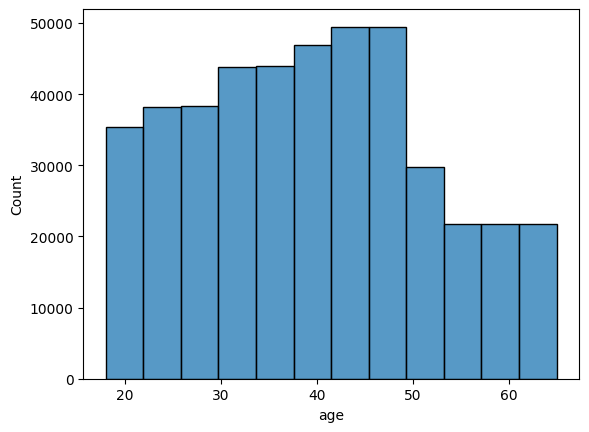

In [19]:
# Create Histogram
sns.histplot(data=df, x="age", binwidth=4)

- Pada grafik di atas menunjukkan bahwa pelanggan paling banyak dimulai dari usia 20-40 tahun.
- Sedangkan ketika memasuki usia 50-65 tahun, pelanggan cenderung sedikit. Hal ini memungkinkan karena masyarakat dengan rentang usia lansia saat ini masih banyak yang tidak terlalu familiar dengan teknologi. Sehingga wajar jika peminatnya tidak sebanyak masyarakat yang lebih muda dan dewasa.

<Axes: xlabel='age', ylabel='Count'>

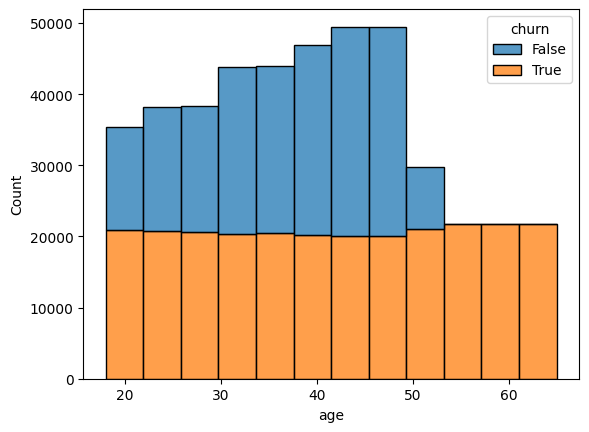

In [20]:
# Create Histogram Age and Churn
sns.histplot(data=df, x="age", binwidth=4, hue='churn', multiple='stack')

- Terlihat grafik usia dengan grafik churn di atas menunjukkan bahwa persebaran customer yang churn merata dari semua usia. Namun, terlihat churn paling besar ada pada rentang usia customer yang berusia 50-65 tahun.

### D.3.2. Kolom tenure

In [21]:
# Cek statistik
df.tenure.describe()

count    440832.000000
mean         31.256336
std          17.255727
min           1.000000
25%          16.000000
50%          32.000000
75%          46.000000
max          60.000000
Name: tenure, dtype: float64

<Axes: xlabel='tenure', ylabel='Count'>

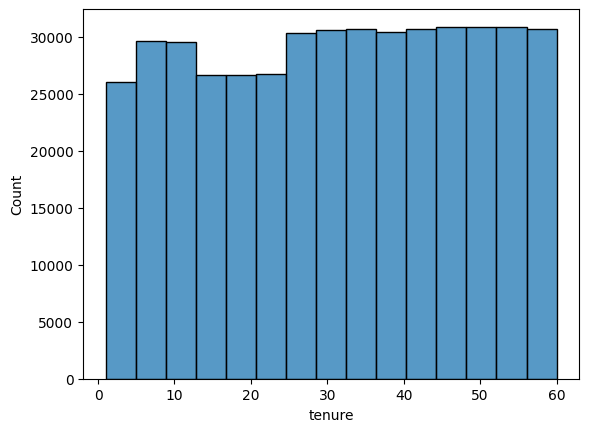

In [22]:
# Create Histogram
sns.histplot(data=df, x="tenure", binwidth=4)

<Axes: xlabel='tenure', ylabel='Count'>

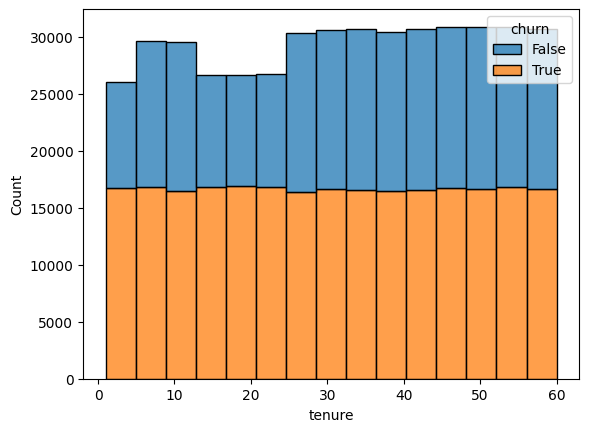

In [23]:
# Create Histogram tenure and Churn
sns.histplot(data=df, x="tenure", binwidth=4, hue='churn', multiple='stack')

### D.3.3. Kolom usage_frequency

In [24]:
# Cek statistik
df.usage_frequency.describe()

count    440832.000000
mean         15.807494
std           8.586242
min           1.000000
25%           9.000000
50%          16.000000
75%          23.000000
max          30.000000
Name: usage_frequency, dtype: float64

<Axes: xlabel='usage_frequency', ylabel='Count'>

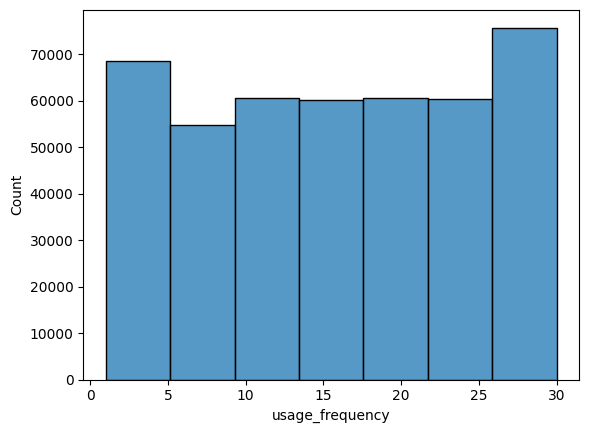

In [25]:
# Create Histogram
sns.histplot(data=df, x="usage_frequency", binwidth=4)

<Axes: xlabel='usage_frequency', ylabel='Count'>

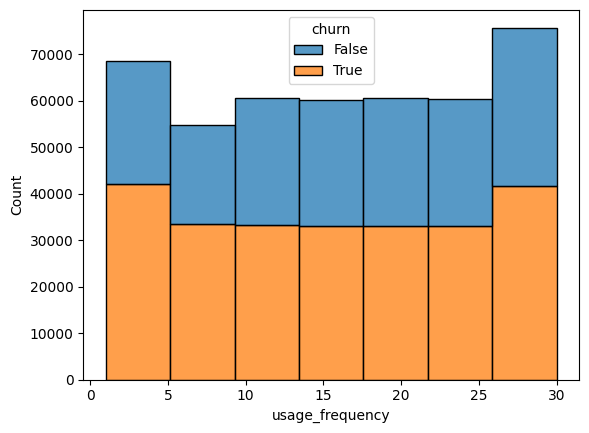

In [26]:
# Create Histogram usage_frequency and Churn
sns.histplot(data=df, x="usage_frequency", binwidth=4, hue='churn', multiple='stack')

### D.3.4. Kolom support_calls

In [27]:
# Cek statistik
df.support_calls.describe()

count    440832.000000
mean          3.604437
std           3.070218
min           0.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          10.000000
Name: support_calls, dtype: float64

<Axes: xlabel='support_calls', ylabel='Count'>

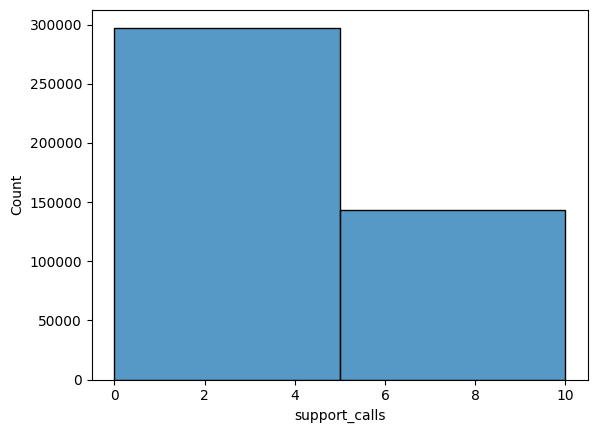

In [28]:
# Create Histogram
sns.histplot(data=df, x="support_calls", binwidth=4)

<Axes: xlabel='support_calls', ylabel='Count'>

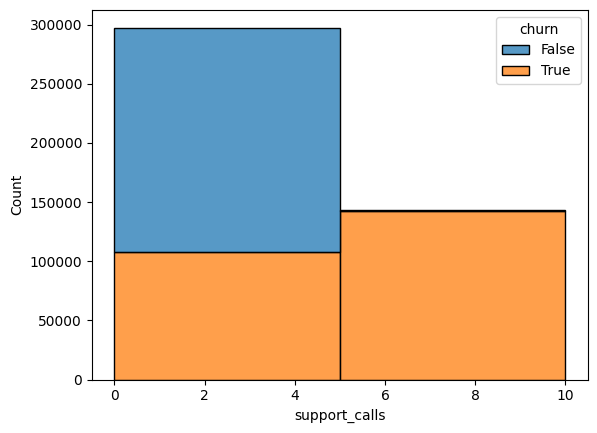

In [29]:
# Create Histogram support_calls and Churn
sns.histplot(data=df, x="support_calls", binwidth=4, hue='churn', multiple='stack')

### D.3.5. Kolom payment_delay

In [30]:
# Cek statistik
df.payment_delay.describe()

count    440832.000000
mean         12.965722
std           8.258063
min           0.000000
25%           6.000000
50%          12.000000
75%          19.000000
max          30.000000
Name: payment_delay, dtype: float64

<Axes: xlabel='payment_delay', ylabel='Count'>

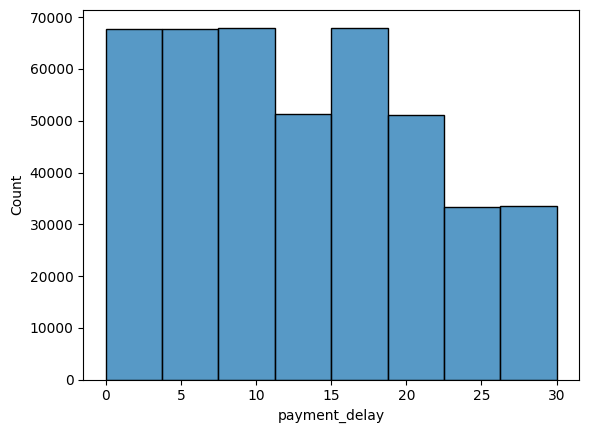

In [31]:
# Create Histogram
sns.histplot(data=df, x="payment_delay", binwidth=4)

<Axes: xlabel='payment_delay', ylabel='Count'>

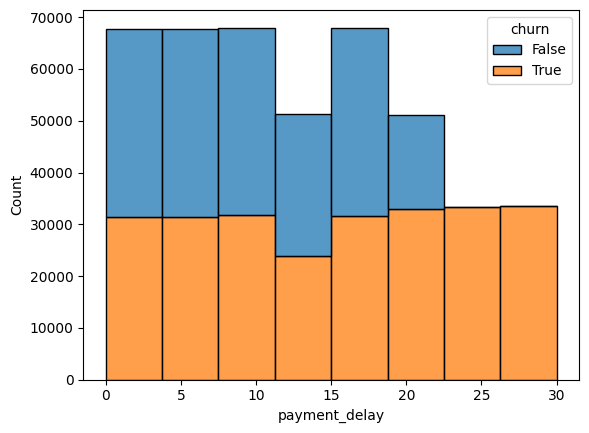

In [32]:
# Create Histogram payment_delay and Churn
sns.histplot(data=df, x="payment_delay", binwidth=4, hue='churn', multiple='stack')

### D.3.6. Kolom total_spend

In [33]:
# Cek statistik
df.total_spend.describe()

count    440832.000000
mean        631.616223
std         240.803001
min         100.000000
25%         480.000000
50%         661.000000
75%         830.000000
max        1000.000000
Name: total_spend, dtype: float64

<Axes: >

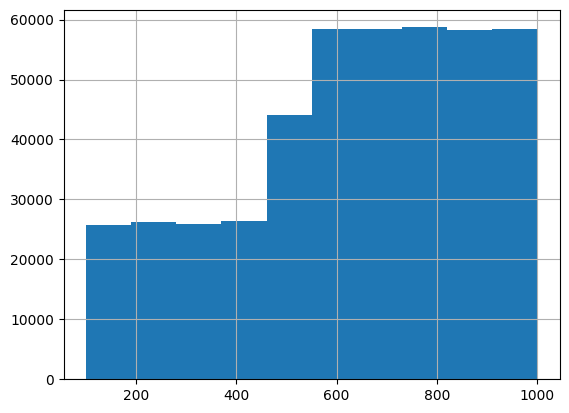

In [34]:
# Histogram
df.total_spend.hist()

<Axes: xlabel='total_spend', ylabel='Count'>

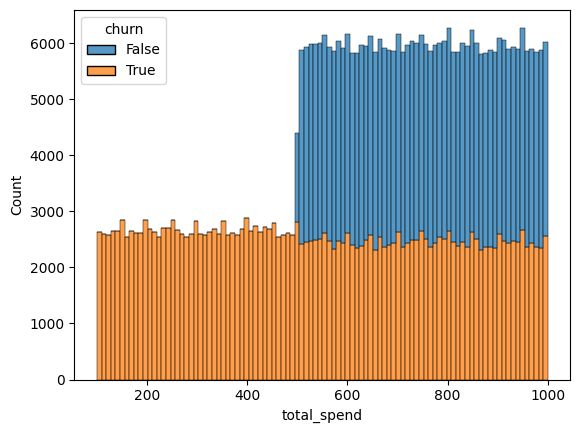

In [35]:
# Create Histogram total_spend and Churn
sns.histplot(data=df, x="total_spend", hue='churn', multiple='stack')

### D.3.7. Kolom last_interaction

In [36]:
# Cek statistik
df.last_interaction.describe()

count    440832.000000
mean         14.480868
std           8.596208
min           1.000000
25%           7.000000
50%          14.000000
75%          22.000000
max          30.000000
Name: last_interaction, dtype: float64

<Axes: xlabel='last_interaction', ylabel='Count'>

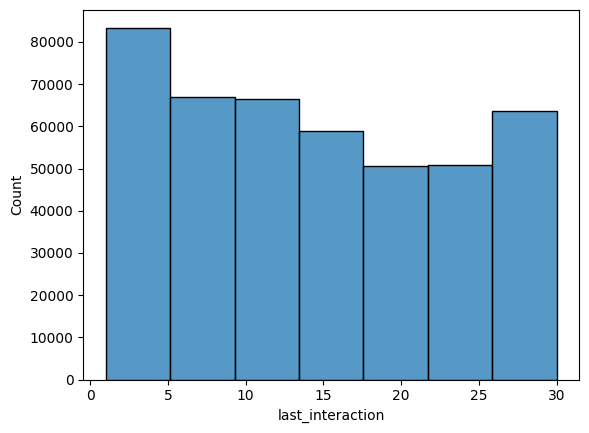

In [37]:
# Create Histogram
sns.histplot(data=df, x="last_interaction", binwidth=4)

<Axes: xlabel='last_interaction', ylabel='Count'>

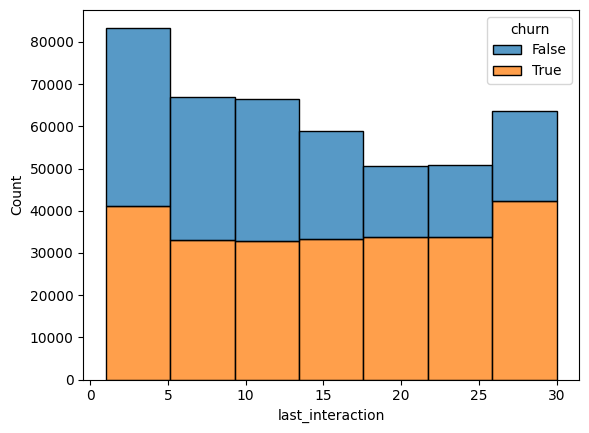

In [38]:
# Create Histogram last_interaction and Churn
sns.histplot(data=df, x="last_interaction", binwidth=4, hue='churn', multiple='stack')

## D.4. Kategorik

### D.4.1. Kolom Gender

In [39]:
# Cek unique value
df.gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [40]:
# Cek total value kolom gender
df.gender.value_counts()

gender
Male      250252
Female    190580
Name: count, dtype: int64

- Berdasarkan angka di atas, pelanggan laki-laki lebih banyak daripada pelanggan perempuan.

([<matplotlib.patches.Wedge at 0x2539d2f2370>,
 [Text(-0.23213090283857246, 1.0752279962628155, 'Male'),
  Text(0.2321307404836593, -1.0752280313135945, 'Female')])

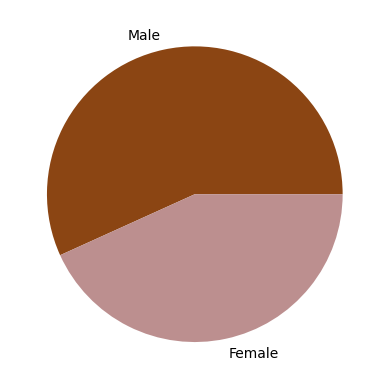

In [62]:
fig, ax = plt.subplots()
ax.pie(df.gender.value_counts(), labels=['Male','Female'], colors=['saddlebrown', 'rosybrown'])

<Axes: xlabel='age', ylabel='gender'>

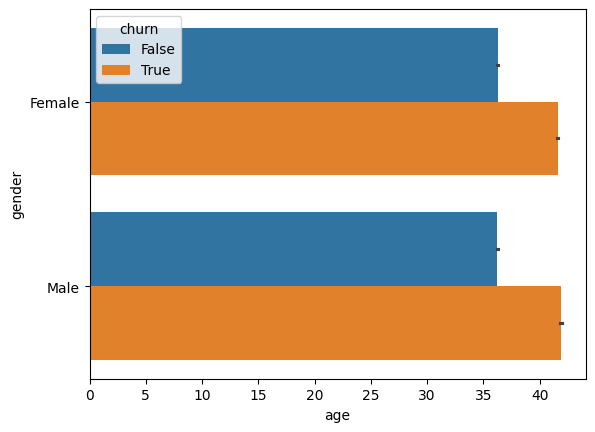

In [52]:
# Plot age, gender dan churn
sns.barplot(df, x="age", y="gender", hue="churn")

### D.4.2. Kolom subscription_type

In [43]:
# Cek total value kolom subscription_type
df.subscription_type.value_counts()

subscription_type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

<Axes: xlabel='subscription_type'>

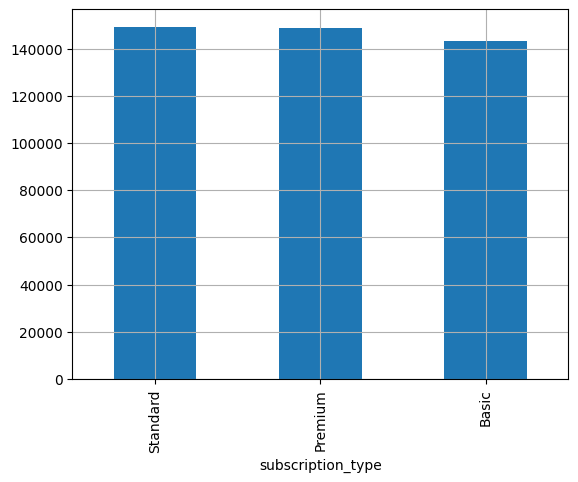

In [44]:
# Plot
df.subscription_type.value_counts().plot(kind='bar', grid=True)

<Axes: ylabel='subscription_type'>

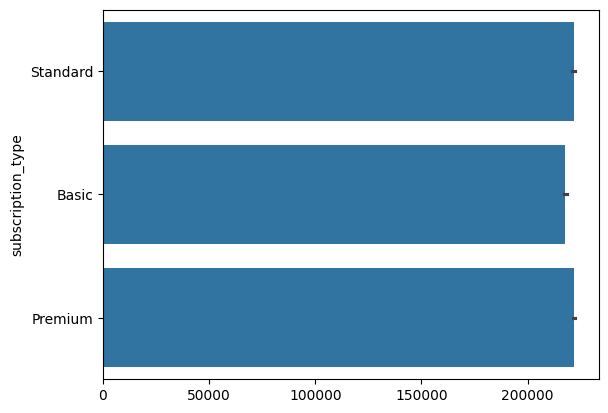

In [45]:
sns.barplot(df['subscription_type'])

<Axes: xlabel='age', ylabel='subscription_type'>

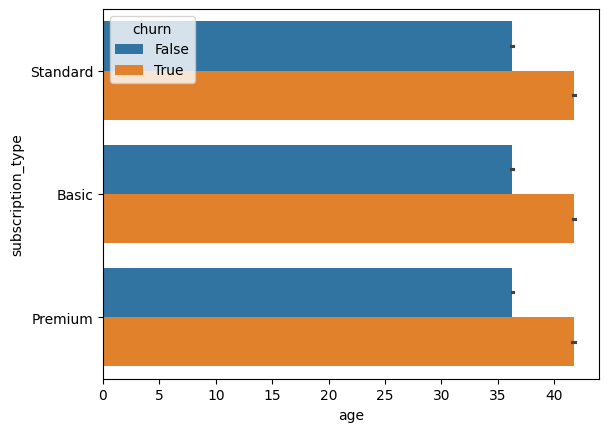

In [46]:
# Plot age, subscription_type, dan churn
sns.barplot(df, x="age", y="subscription_type", hue="churn")

### D.4.3. Kolom contract_length

In [47]:
# Cek total value pada kolom contract_length
df.contract_length.value_counts()

contract_length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

<Axes: xlabel='contract_length'>

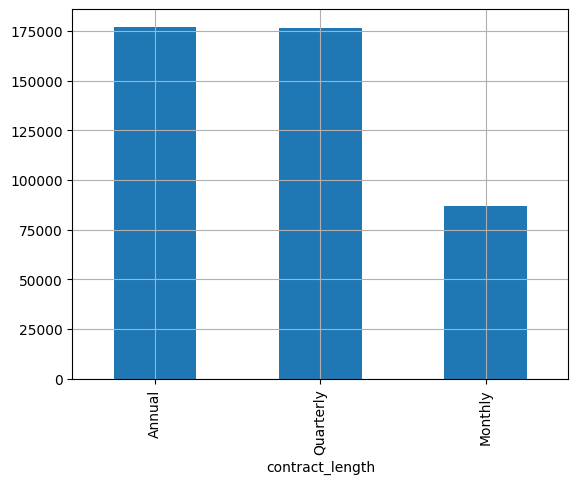

In [48]:
# Plot
df.contract_length.value_counts().plot(kind='bar', grid=True)

<Axes: xlabel='age', ylabel='contract_length'>

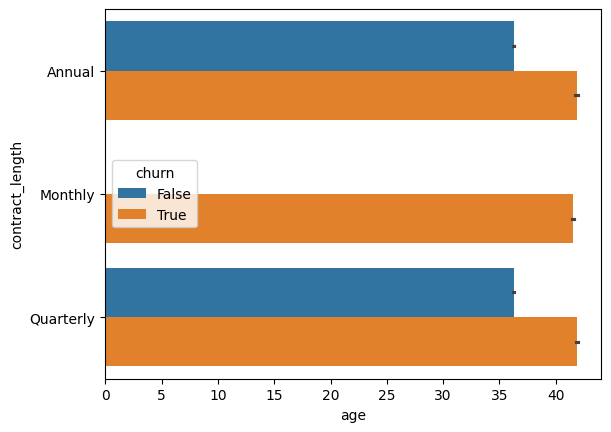

In [63]:
sns.barplot(df, x="age", y="contract_length", hue="churn")